In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import seaborn as sns
import math as m
from acquire import *
from prepare_zillow import *
from explore_zillow import *

In [2]:
# turn_to_csv()

In [3]:
df = pd.read_csv('zillow_16_17.csv', sep='\t')

In [4]:
description_df = df[['unitcnt','propertylandusedesc',
                     'propertycountylandusecode', 'propertyzoningdesc', 'heatingorsystemdesc']]

In [5]:
df = drop_columns(df)

In [6]:
df = reindex_df(df)

In [7]:
df = dropna_fields(df)

In [8]:
df = unitcnt(df)

In [9]:
df = field_temp_drop(df)

In [10]:
df = lat_long_null_values(df)

In [11]:
df = drop_null(df)

In [12]:
df = df.dropna()

In [13]:
df = logerror_manipulation_func(df)

In [14]:
cols = list([
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount'])

col_1 = list([
 'logerror',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt'])

col_2 = list([
 'logerror',
 'yearbuilt'])

col_3 = list([
 'logerror',
 'lotsizesquarefeet',
 'landtaxvaluedollarcnt',])

col_4 = list([
 'logerror',
 'longitude',
 'latitude',])

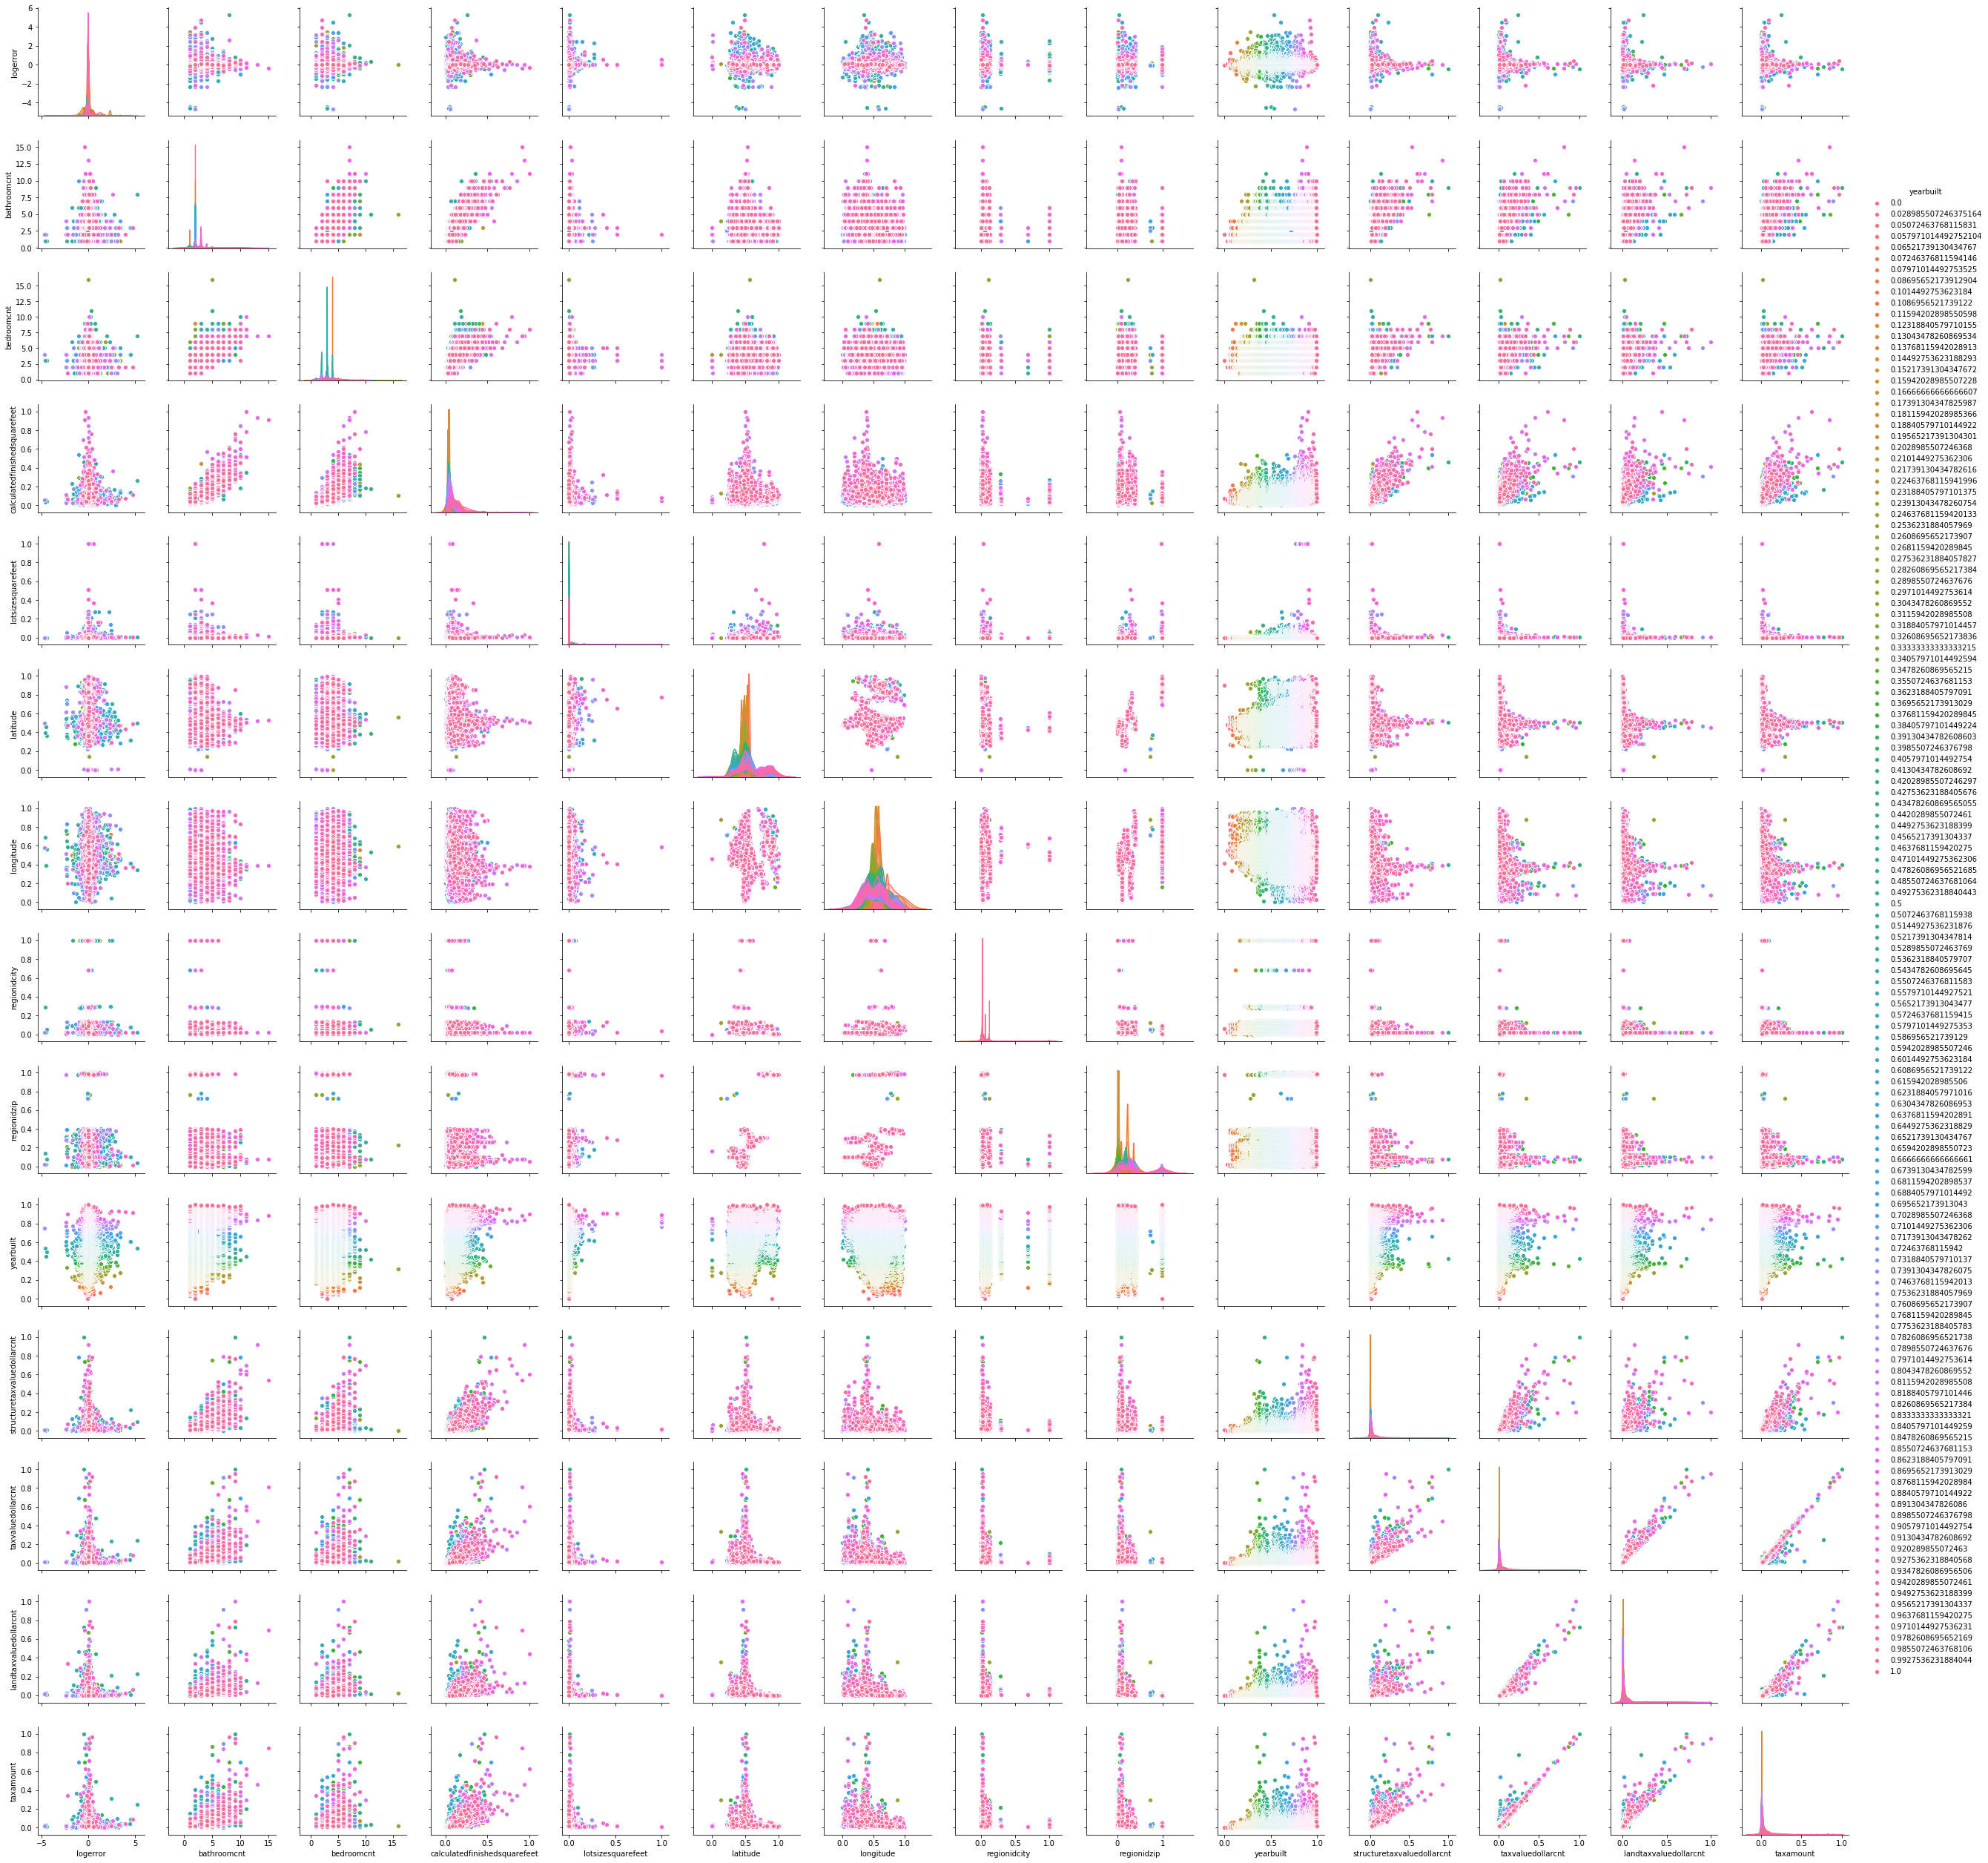

In [60]:
# sns.pairplot(pair_df, hue='yearbuilt')

sns.pairplot(df.loc[:,cols], hue='yearbuilt')


In [13]:
scale_df = scale_min_max_iris(df)

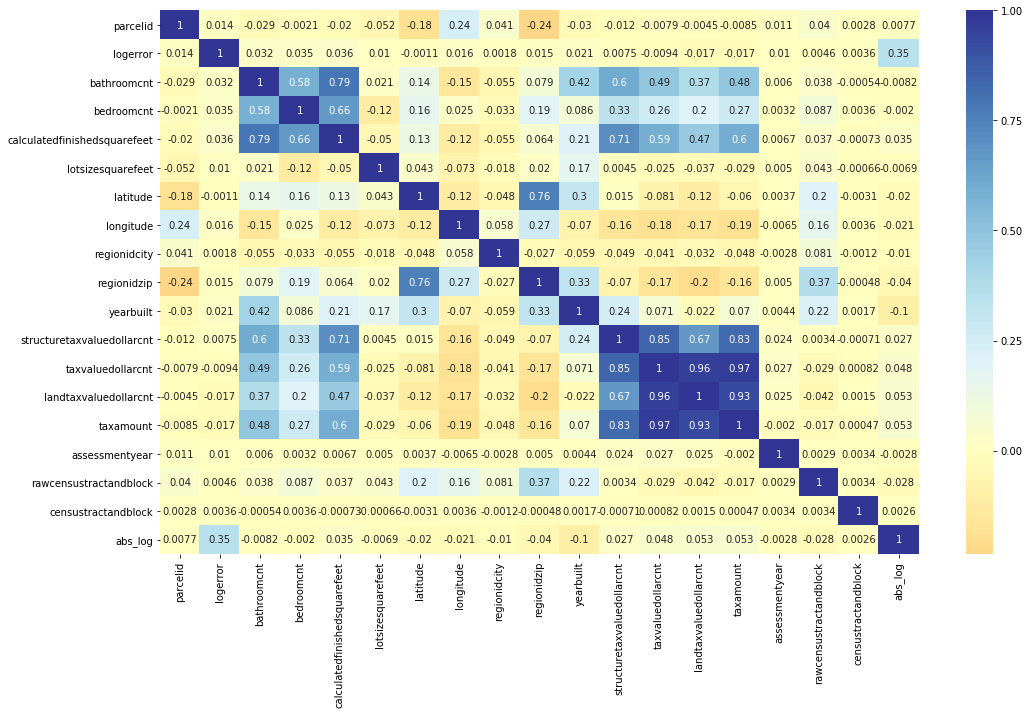

In [15]:
heatmap_func(df)

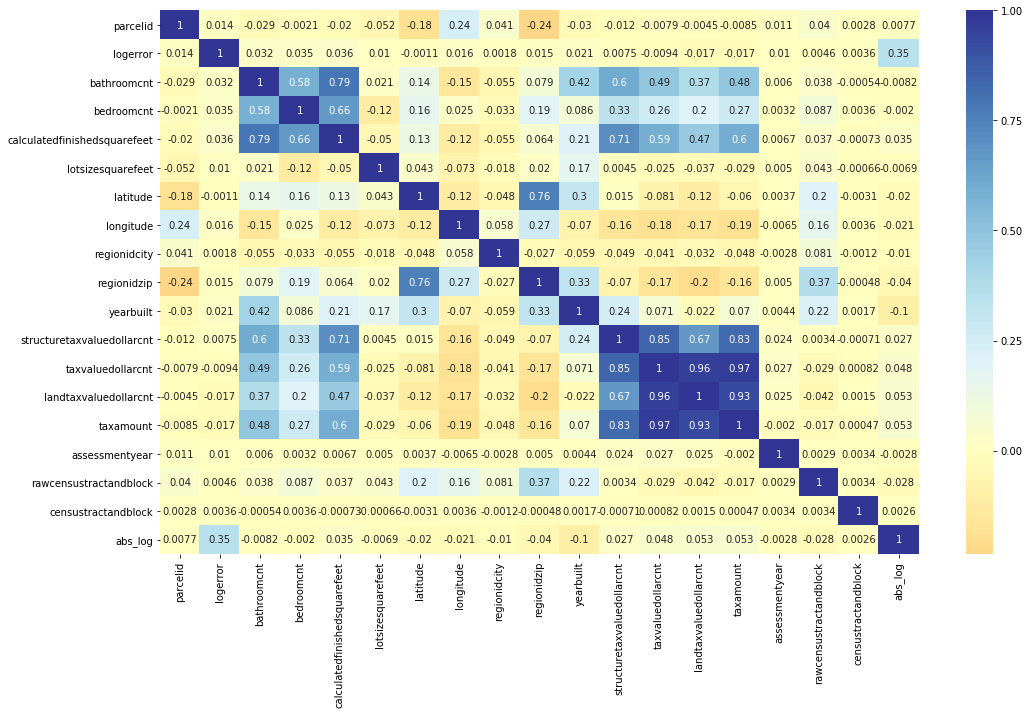

In [19]:
heatmap_func(scale_df)

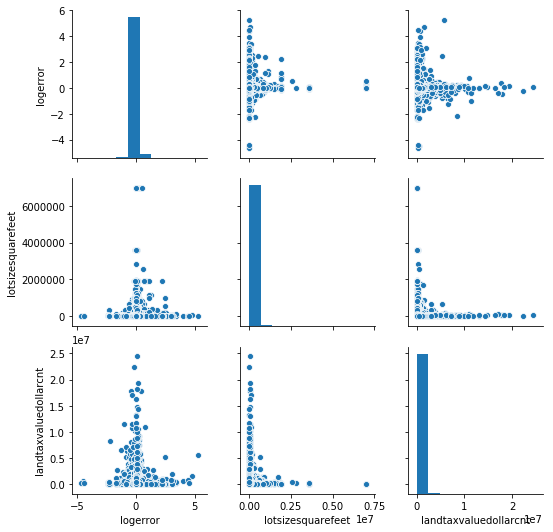

In [14]:
pairplot_func(df, col_3)

### Wasn't really sure if I had seen anything yet. I had a thought that log error might be high in certain locations. To check this i needed to look at lat/long and log error all together. Since this dataset is so dense iit would not be feasible to use a 2D scatter plot. I decided it would make sense to use a 3D plot because it would give a better view of the high/low log errors in relation to the lt/long. I went with a TriTurf plot to start.

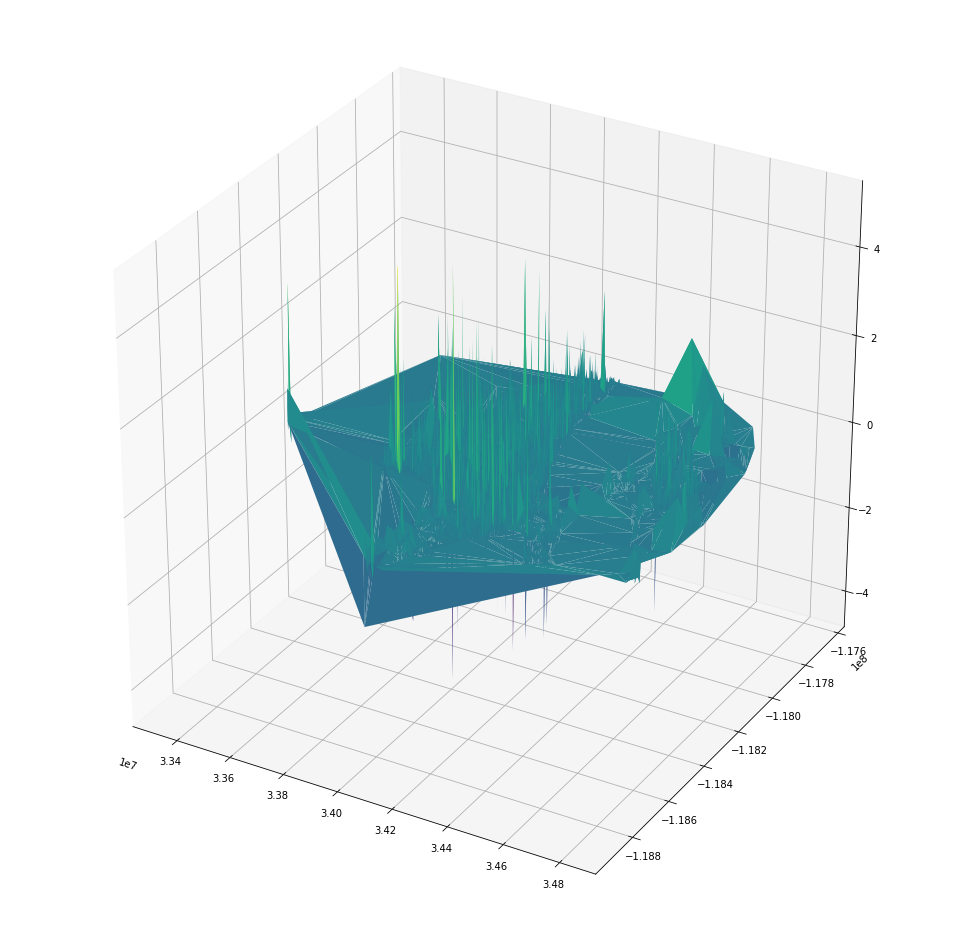

In [13]:
trisurf_func(df.latitude, df.longitude, df.logerror)

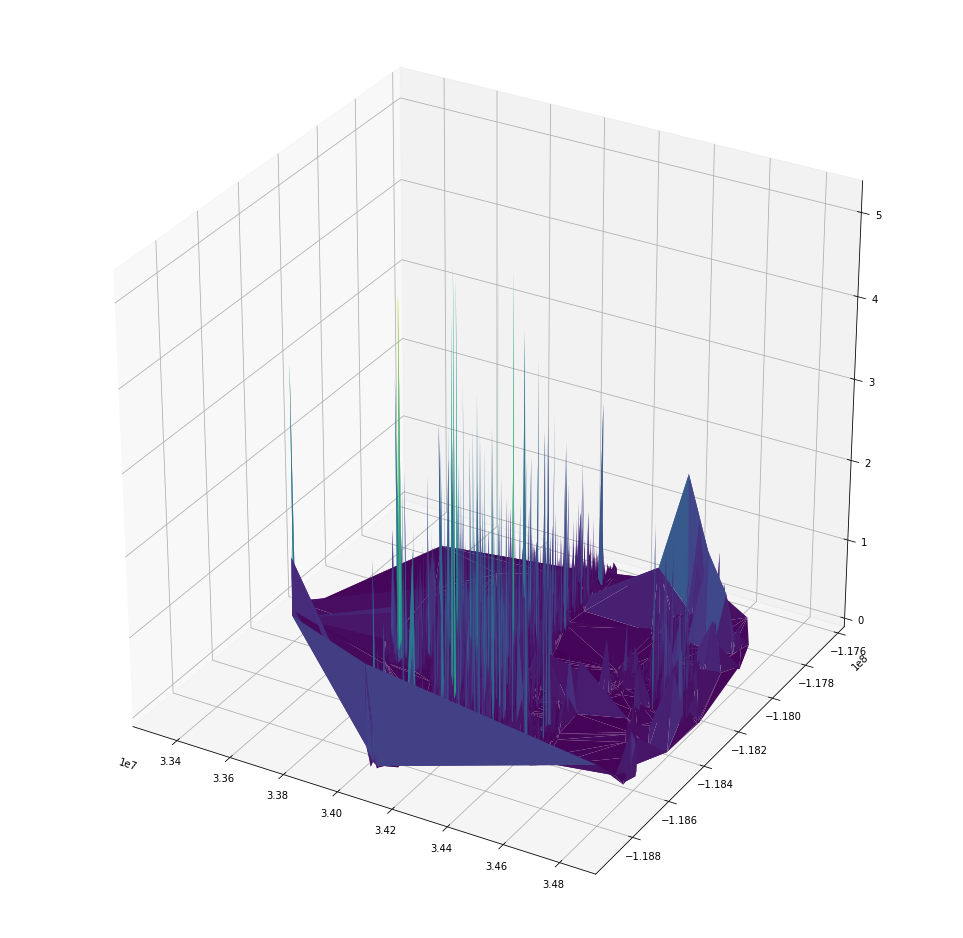

In [15]:
trisurf_func(df.latitude, df.longitude, df.abs_log)

### The TriSurf plot is helpful in showing that this type of plot (3D) is appropriate for viewing this type of data, but the TriSurf plot itself is not helpful in and of itself because the Z-axis data (logerror) is highly sporatic. A TriSurf plot needs less dramatic shifts in the Z-axis and there needs to be more density in the X-axis and the Y-axis, would be very useful for geopraghic data if elevation was given. Because this plot wasn't appropriate I decided to try using a 3D Scatterplot.

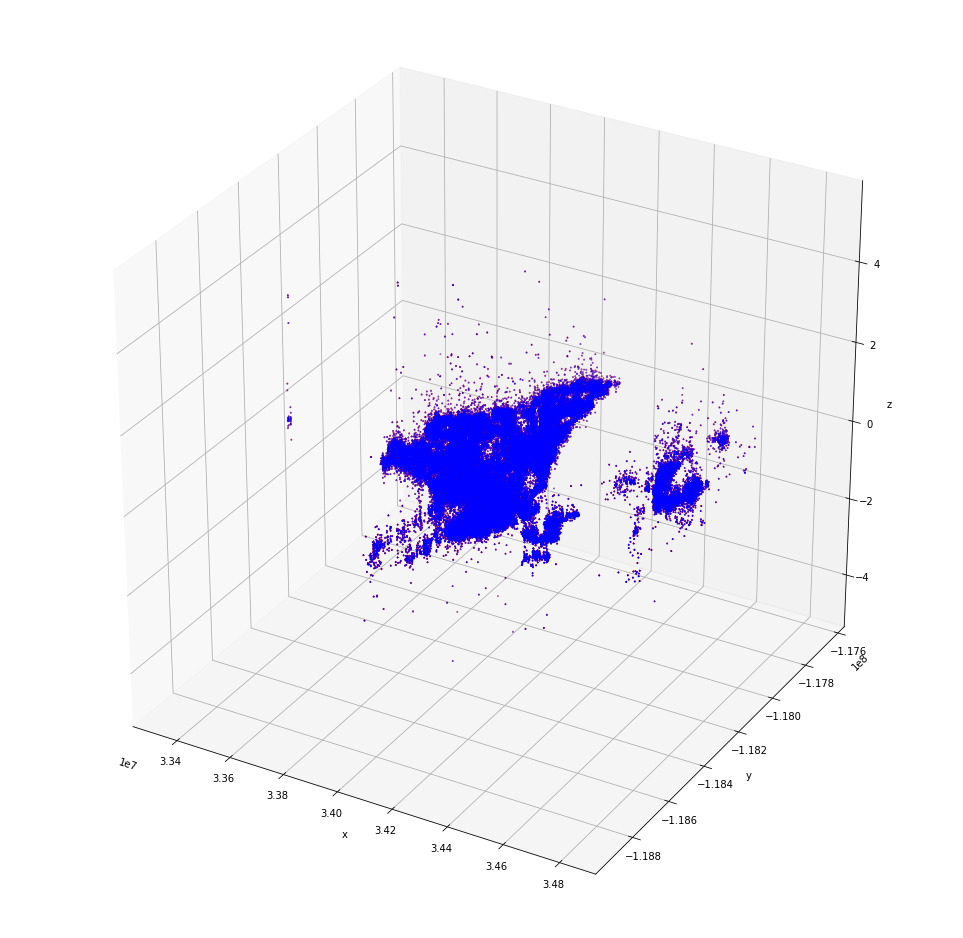

In [13]:
scatter_3d(df.latitude, df.longitude, df.logerror)

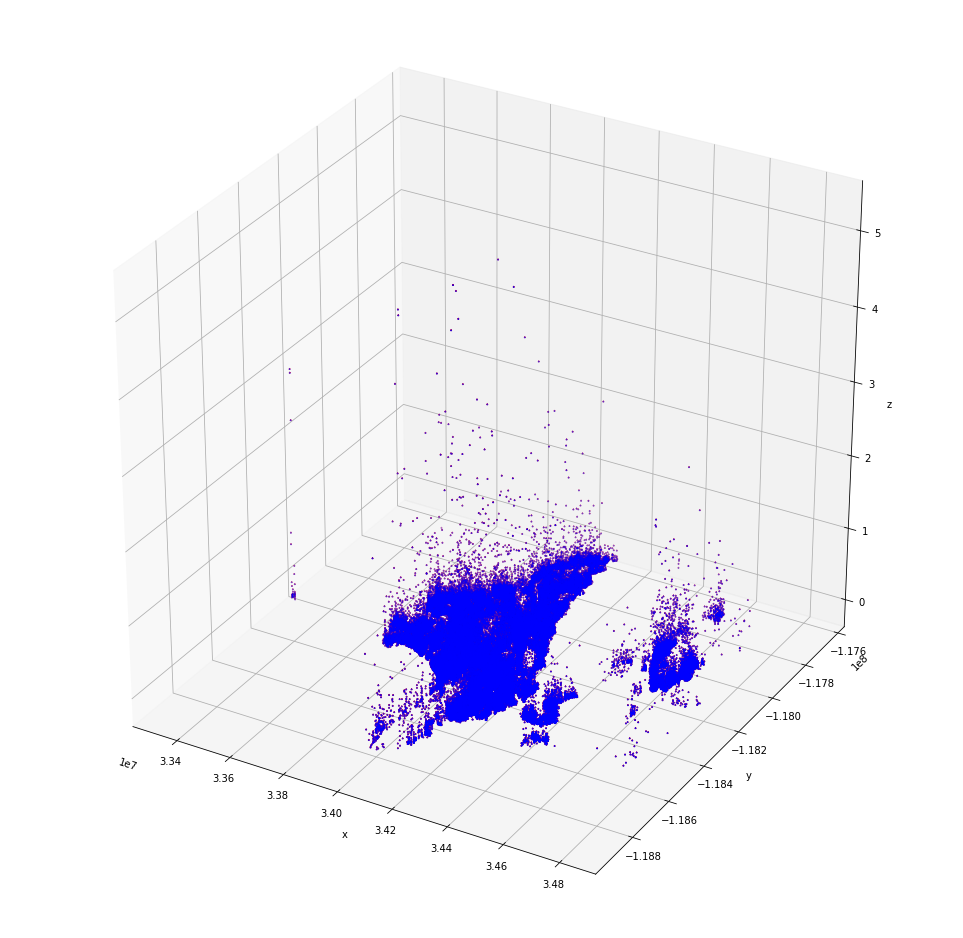

In [16]:
scatter_3d(df.latitude, df.longitude, df.abs_log)

### Run a pairplot on lat/long and log error to look at their relationships 2-dimensionally

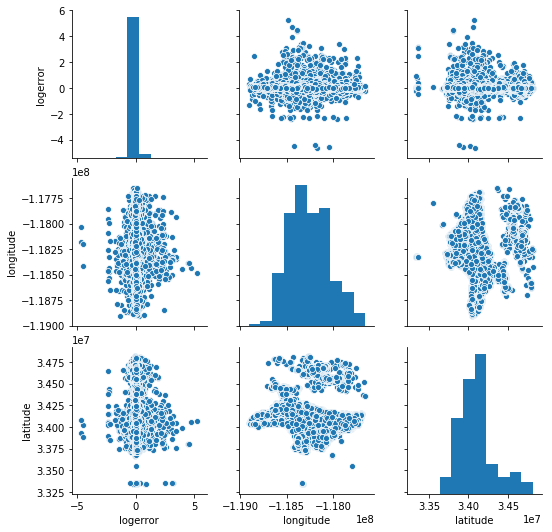

In [15]:
pairplot_func(df, col_4)

### After running the 3d scatterplot I could see concentrated areas of homes. The 3D view was sshowing me that there was a large number of datapoints on top of each other making it very hard to see what was going on or how much was really there. As seen before the 2D scatter plots do a poor job of showing an extremely dense plot. From there I decided that a KDE density plot was the most appropriate plot to check next.

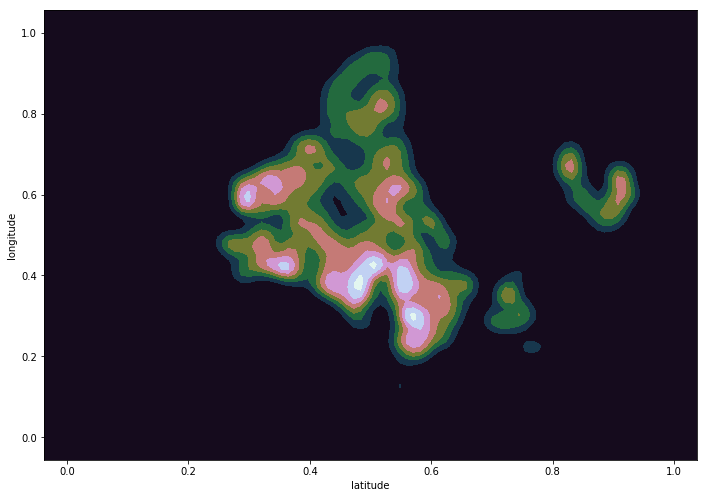

In [68]:
kde_func(df.latitude, df.longitude)

In [15]:
df['abs_log'] = df.logerror.abs()

df['logerror_bin'] = pd.qcut(df.abs_log, 4, labels=["good", "medium-", "medium+", "bad"])

# <span style="color:red"> Time to start clustering </span>

### Looking at the kde plot I can see several key points that I might want a centroid for clustering. I will run 4 kmeans looking at 5, 6, 7, 8, 9 and 10 centroids to see which is more accurate. My presumption is that 8 will be the most accurate, but because of how close the high levels of density are, and how spread out the low levels of density are looking at a lower and higher number of centroids is necessary.

In [18]:
df.describe().T

count                  mean  \
parcelid                                92,574.00         11,857,871.36   
logerror                                92,574.00                  0.01   
bathroomcnt                             92,574.00                  2.18   
bedroomcnt                              92,574.00                  2.95   
calculatedfinishedsquarefeet            92,574.00              1,665.61   
lotsizesquarefeet                       92,574.00             38,684.91   
latitude                                92,574.00         34,104,673.72   
longitude                               92,574.00       -118,256,601.77   
regionidcity                            92,574.00             35,419.06   
regionidzip                             92,574.00             96,345.70   
yearbuilt                               92,574.00              1,962.35   
structuretaxvaluedollarcnt              92,574.00            172,867.52   
taxvaluedollarcnt                       92,574.00            445,939.22   
landtaxvaluedollarcnt                   92,574.00            273,071.70   
taxamount                               92,574.00              5,836.47   
assessmentyear                          92,574.00              2,015.47   
rawcensustractandblock                  92,574.00         60,374,455.81   
censustractandblock                     92,574.00 60,379,035,558,596.81   
abs_log                                 92,574.00                  0.07   

                                              std                   min  \
parcelid                               719,582.17         10,711,738.00   
logerror                                     0.16                 -4.66   
bathroomcnt                                  0.97                  1.00   
bedroomcnt                                   0.99                  1.00   
calculatedfinishedsquarefeet               885.81                214.00   
lotsizesquarefeet                      146,062.08                857.00   
latitude                               219,561.93         33,339,527.00   
longitude                              215,492.71       -118,908,236.00   
regionidcity                            57,861.00              3,491.00   
regionidzip                                332.53             95,982.00   
yearbuilt                                   23.10              1,878.00   
structuretaxvaluedollarcnt             225,655.85                100.00   
taxvaluedollarcnt                      640,192.05              3,254.00   
landtaxvaluedollarcnt                  464,159.81                161.00   
taxamount                                7,780.71                120.84   
assessmentyear                               0.50              2,015.00   
rawcensustractandblock                   3,201.42         60,371,011.10   
censustractandblock          1,389,132,193,879.04 60,371,011,101,000.00   
abs_log                                      0.14                  0.00   

                                               25%                   50%  \
parcelid                             11,195,035.25         11,852,924.00   
logerror                                     -0.03                  0.01   
bathroomcnt                                   2.00                  2.00   
bedroomcnt                                    2.00                  3.00   
calculatedfinishedsquarefeet              1,128.00              1,448.00   
lotsizesquarefeet                         6,040.00              7,621.00   
latitude                             33,957,799.25         34,086,700.00   
longitude                          -118,418,895.00       -118,273,284.50   
regionidcity                             12,447.00             14,634.00   
regionidzip                              96,123.00             96,282.00   
yearbuilt                                 1,949.00              1,959.00   
structuretaxvaluedollarcnt               79,000.00            125,805.50   
taxvaluedollarcnt                       173,396.00    

In [20]:
df.head().T

0                     2  \
parcelid                                  11016594              12098116   
logerror                                      0.03                 -0.00   
bathroomcnt                                   2.00                  3.00   
bedroomcnt                                    3.00                  2.00   
calculatedfinishedsquarefeet              1,684.00              2,217.00   
lotsizesquarefeet                         7,528.00             11,423.00   
latitude                             34,280,990.00         34,136,312.00   
longitude                          -118,488,536.00       -118,175,032.00   
regionidcity                             12,447.00             47,019.00   
regionidzip                              96,370.00             96,293.00   
yearbuilt                                 1,959.00              1,940.00   
structuretaxvaluedollarcnt              122,754.00             61,994.00   
taxvaluedollarcnt                       360,170.00            119,906.00   
landtaxvaluedollarcnt                   237,416.00             57,912.00   
taxamount                                 6,735.88             11,484.48   
assessmentyear                            2,015.00              2,015.00   
rawcensustractandblock               60,371,066.46         60,374,638.00   
censustractandblock          60,371,066,461,001.00 60,374,638,003,004.00   
abs_log                                       0.03                  0.00   
logerror_bin                               medium-                  good   

                                                 3                     5  \
parcelid                                  12643413              11509835   
logerror                                      0.02                 -0.27   
bathroomcnt                                   2.00                  4.00   
bedroomcnt                                    2.00                  4.00   
calculatedfinishedsquarefeet                839.00              3,067.00   
lotsizesquarefeet                        70,859.00              2,708.00   
latitude                             33,755,800.00         33,870,089.00   
longitude                          -118,309,000.00       -118,402,768.00   
regionidcity                             12,447.00             29,712.00   
regionidzip                              96,222.00             96,109.00   
yearbuilt                                 1,987.00              1,982.00   
structuretaxvaluedollarcnt              171,518.00            880,650.00   
taxvaluedollarcnt                       244,880.00          2,447,951.00   
landtaxvaluedollarcnt                    73,362.00          1,567,301.00   
taxamount                                 3,048.74             27,126.57   
assessmentyear                            2,015.00              2,015.00   
rawcensustractandblock               60,372,963.00         60,376,210.04   
censustractandblock          60,372,963,002,002.00 60,376,210,044,006.00   
abs_log                                       0.02                  0.27   
logerror_bin                               medium-                   bad   

                                                 6  
parcelid                                  12286022  
logerror                                      0.04  
bathroomcnt                                   1.00  
bedroomcnt                                    2.00  
calculatedfinishedsquarefeet              1,297.00  
lotsizesquarefeet                         6,677.00  
latitude                             33,899,475.00  
longitude                          -118,212,720.00  
regionidcity                             24,174.00  
regionidzip                              96,091.00  
yearbuilt                                 1,939.00  
structuretaxvaluedollarcnt               64,549.00  
taxvaluedollarcnt                       111,521.00  
landtaxvaluedollarcnt                    46,972.00  
taxamount                                 2,304.97  
assessm

In [ ]:
df_bad_log = df.where(df.logerror_bin=='bad')